In [44]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'hasil/0905_2_N2O_Agriculture_OutlierDetection_5_Update09062024.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2246 non-null   object 
 1   Year                 2246 non-null   int64  
 2   Experiment           2246 non-null   object 
 3   DataUse              2246 non-null   object 
 4   Replication          2246 non-null   object 
 5   Month                2246 non-null   object 
 6   Vegetation           2246 non-null   object 
 7   VegType              2246 non-null   object 
 8   N2O                  2246 non-null   float64
 9   N_rate               2246 non-null   int64  
 10  PP2                  2246 non-null   float64
 11  PP7                  2246 non-null   float64
 12  AirT                 2246 non-null   float64
 13  DAF_TD               2246 non-null   int64  
 14  DAF_SD               2246 non-null   int64  
 15  WFPS25cm             2194 non-null   f

(      Date  Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  2012   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  2012   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  2012   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  2012   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  2012   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O  N_rate  ...       SOM  iqr_outlier  zscore_outlier  \
 0  Annual  3.896742     170  ...  1.174072            1               1   
 1  Annual  2.190218     170  ...  1.174072            1               1   
 2  Annual  3.542594     170  ...  1.174072            1               1   
 3  Annual  3.342870     170  ...  1.174072            1               1   
 4  Annual  2.947778     170  ...  1.174072            1               1   
 
    if_outlier  dbscan_outlier  ocsvm_outlier  lof_outlier  \
 0           1              

In [45]:
# Define the methods with the correct column names including the '_outlier' suffix
methods = ['iqr_outlier', 'zscore_outlier', 'if_outlier', 'dbscan_outlier', 
           'ocsvm_outlier', 'lof_outlier', 'gaussianpdf_outlier', 
           'bgm_outlier', 'nb_outlier']

# Majority Voting
data['majority_voting'] = data[methods].mode(axis=1)[0]

In [46]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,iqr_outlier,zscore_outlier,if_outlier,dbscan_outlier,ocsvm_outlier,lof_outlier,gaussianpdf_outlier,bgm_outlier,nb_outlier,majority_voting
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,1,1,1,1,1,1,1,1,1,1
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,1,1,1,1,1,1,1,1,1,1
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,1,1,1,1,1,1,1,1,1,1
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,1,1,1,1,1,1,1,1,1,1
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,MCSE-T2,Testing,R4,October,TRIAE,Annual,1.640000,91,...,1,1,1,1,1,1,1,1,1,1
2242,11/15/2013,2013,MCSE-T2,Testing,R1,November,TRIAE,Annual,0.990000,91,...,1,1,1,1,1,1,1,1,1,1
2243,11/15/2013,2013,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.200000,91,...,1,1,1,1,1,1,1,1,1,1
2244,11/15/2013,2013,MCSE-T2,Testing,R3,November,TRIAE,Annual,0.300000,91,...,1,1,1,1,1,1,1,1,1,1


In [47]:
# Average Voting
# Convert binary labels to scores (0 for inliers, 1 for outliers)
score_df = data[methods].replace({1: 0, -1: 1})

# Apply average voting
average_scores = score_df.mean(axis=1)
threshold = 0.5  # Threshold to classify as outlier
data['average_voting'] = average_scores.apply(lambda x: -1 if x > threshold else 1)

In [48]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,zscore_outlier,if_outlier,dbscan_outlier,ocsvm_outlier,lof_outlier,gaussianpdf_outlier,bgm_outlier,nb_outlier,majority_voting,average_voting
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,1,1,1,1,1,1,1,1,1,1
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,1,1,1,1,1,1,1,1,1,1
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,1,1,1,1,1,1,1,1,1,1
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,1,1,1,1,1,1,1,1,1,1
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,MCSE-T2,Testing,R4,October,TRIAE,Annual,1.640000,91,...,1,1,1,1,1,1,1,1,1,1
2242,11/15/2013,2013,MCSE-T2,Testing,R1,November,TRIAE,Annual,0.990000,91,...,1,1,1,1,1,1,1,1,1,1
2243,11/15/2013,2013,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.200000,91,...,1,1,1,1,1,1,1,1,1,1
2244,11/15/2013,2013,MCSE-T2,Testing,R3,November,TRIAE,Annual,0.300000,91,...,1,1,1,1,1,1,1,1,1,1


In [49]:
data.to_csv('hasil/0905_2_N2O_Agriculture_OutlierDetection_5_Update09062024_VotingBased.csv', index=False)

In [50]:
# Count the summary for each voting method
voting_methods = ['majority_voting', 'average_voting']

# Create a DataFrame to store the summary
summary = {
    'Method': [],
    'Outliers': [],
    'Inliers': [],
    'Total': []
}

for method in voting_methods:
    outliers = (data[method] == -1).sum()
    inliers = (data[method] == 1).sum()
    total = data[method].count()

    summary['Method'].append(method)
    summary['Outliers'].append(outliers)
    summary['Inliers'].append(inliers)
    summary['Total'].append(total)

# Convert the summary to a pandas DataFrame
summary_df = pd.DataFrame(summary)

In [51]:
summary_df

,Method,Outliers,Inliers,Total
0,majority_voting,45,2201,2246
1,average_voting,45,2201,2246


In [52]:
df=data
# Function to apply majority voting
def majority_voting(*args):
    votes = np.sum(np.array(args), axis=0)
    return np.where(votes > 0, 1, -1)

# Create new outlier columns based on the specified combinations
df['if_lof_outlier'] = majority_voting(df['if_outlier'], df['lof_outlier'])
df['if_by_lof_outlier'] = majority_voting(df['if_outlier'], df['nb_outlier'], df['lof_outlier'])
df['by_lof_outlier'] = majority_voting(df['nb_outlier'], df['lof_outlier'])
df['ido_outlier'] = majority_voting(df['if_outlier'], df['dbscan_outlier'], df['ocsvm_outlier'])
df['iqr_zscore_outlier'] = majority_voting(df['iqr_outlier'], df['zscore_outlier'])
df['if_by_outlier'] = majority_voting(df['if_outlier'], df['nb_outlier'])
df['id_outlier'] = majority_voting(df['if_outlier'], df['dbscan_outlier'])
df['if_osvm_outlier'] = majority_voting(df['if_outlier'], df['ocsvm_outlier'])
df['if_by_osvm_outlier'] = majority_voting(df['if_outlier'], df['nb_outlier'],df['ocsvm_outlier'])


In [53]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,average_voting,if_lof_outlier,if_by_lof_outlier,by_lof_outlier,ido_outlier,iqr_zscore_outlier,if_by_outlier,id_outlier,if_osvm_outlier,if_by_osvm_outlier
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,1,1,1,1,1,1,1,1,1,1
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,1,1,1,1,1,1,1,1,1,1
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,1,1,1,1,1,1,1,1,1,1
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,1,1,1,1,1,1,1,1,1,1
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,MCSE-T2,Testing,R4,October,TRIAE,Annual,1.640000,91,...,1,1,1,1,1,1,1,1,1,1
2242,11/15/2013,2013,MCSE-T2,Testing,R1,November,TRIAE,Annual,0.990000,91,...,1,1,1,1,1,1,1,1,1,1
2243,11/15/2013,2013,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.200000,91,...,1,1,1,1,1,1,1,1,1,1
2244,11/15/2013,2013,MCSE-T2,Testing,R3,November,TRIAE,Annual,0.300000,91,...,1,1,1,1,1,1,1,1,1,1


In [54]:
df.to_csv('hasil/0905_2_N2O_Agriculture_OutlierDetection_5_Update09062024_CombinedOutlier.csv', index=False)

In [57]:
# Count the summary for each voting method
voting_methods = ['if_lof_outlier', 'by_lof_outlier','if_by_lof_outlier','ido_outlier','iqr_zscore_outlier','if_by_outlier','id_outlier','if_osvm_outlier']

# Create a DataFrame to store the summary
summary = {
    'Method': [],
    'Outliers': [],
    'Inliers': [],
    'Total': []
}

for method in voting_methods:
    outliers = (data[method] == -1).sum()
    inliers = (data[method] == 1).sum()
    total = data[method].count()

    summary['Method'].append(method)
    summary['Outliers'].append(outliers)
    summary['Inliers'].append(inliers)
    summary['Total'].append(total)

# Convert the summary to a pandas DataFrame
summary_df = pd.DataFrame(summary)
summary_df

,Method,Outliers,Inliers,Total
0,if_lof_outlier,186,2060,2246
1,by_lof_outlier,130,2116,2246
2,if_by_lof_outlier,57,2189,2246
3,ido_outlier,90,2156,2246
4,iqr_zscore_outlier,251,1995,2246
5,if_by_outlier,113,2133,2246
6,id_outlier,113,2133,2246
7,if_osvm_outlier,135,2111,2246


In [60]:
summary_df.to_csv('hasil/0905_2_N2O_Agriculture_OutlierDetection_5_Update09062024_CombinedOutlier_Summary.csv', index=False)

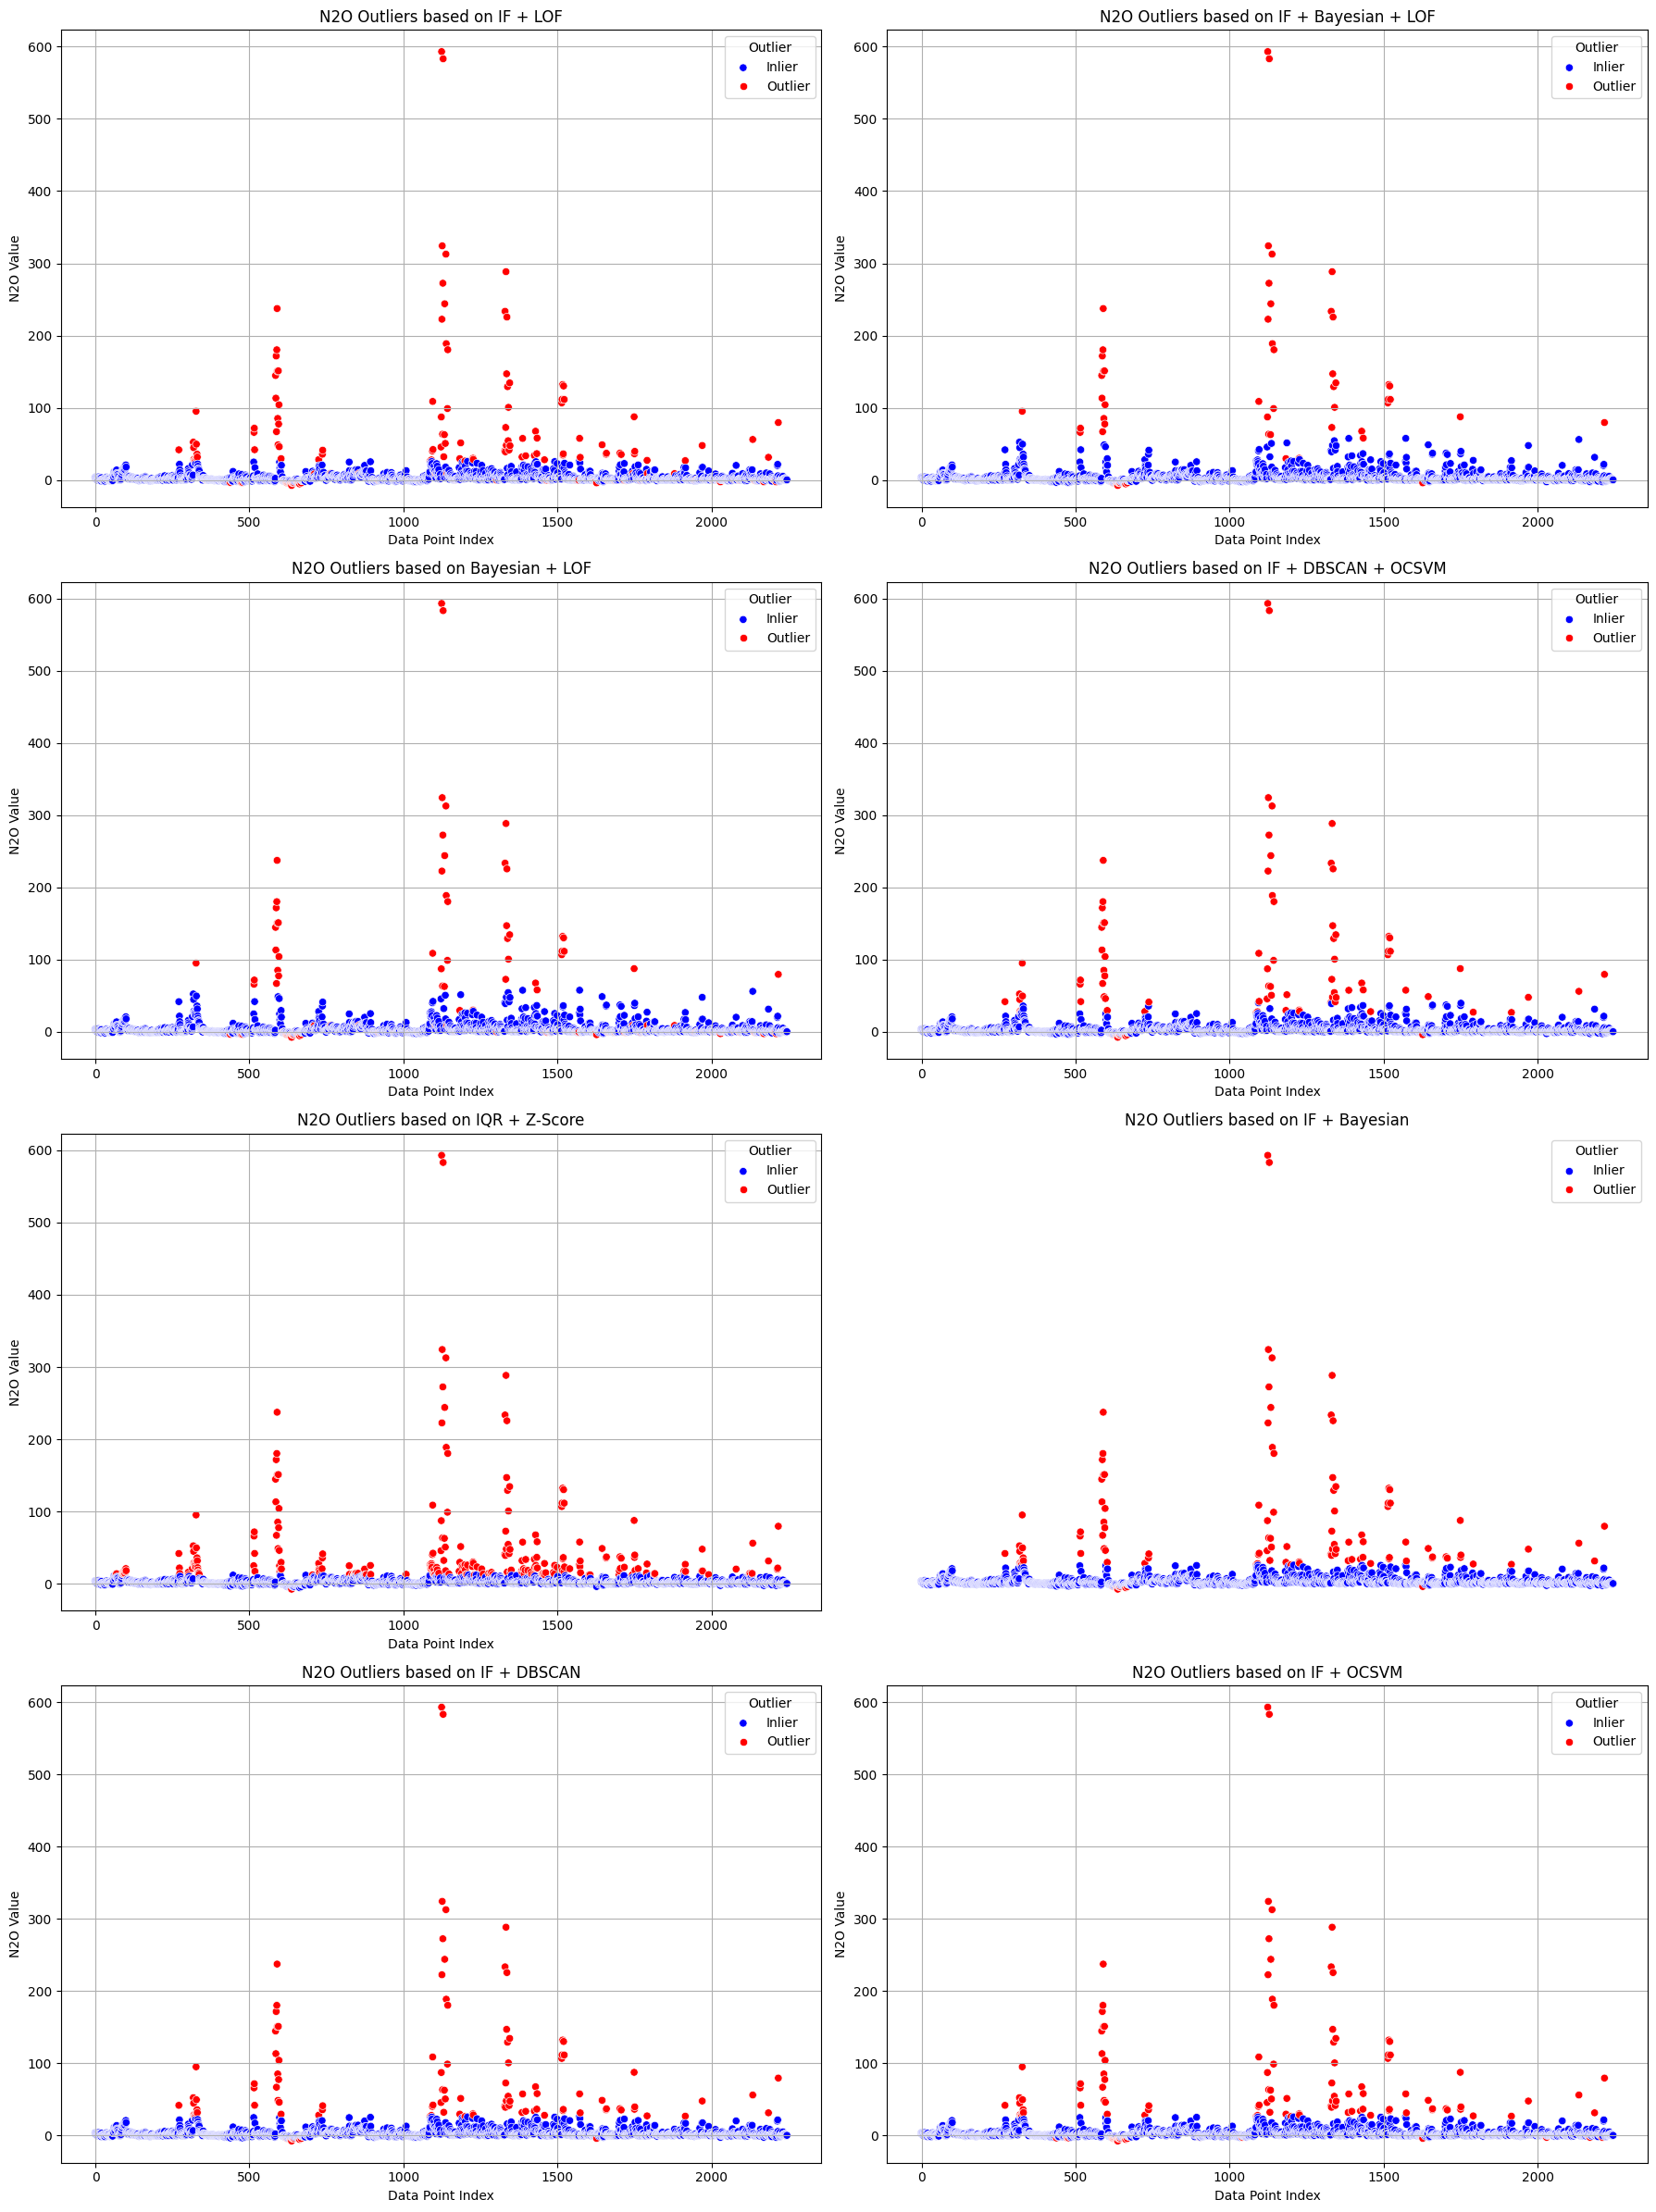

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improved visualization layout with 3x2 grid
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# List of new columns and their titles for visualization
outlier_columns = [
    ('if_lof_outlier', 'IF + LOF'),
    ('if_by_lof_outlier', 'IF + Bayesian + LOF'),
    ('by_lof_outlier', 'Bayesian + LOF'),
    ('ido_outlier', 'IF + DBSCAN + OCSVM'),
    ('iqr_zscore_outlier', 'IQR + Z-Score'),
    ('if_by_outlier', 'IF + Bayesian'),
    ('id_outlier', 'IF + DBSCAN'),
    ('if_osvm_outlier', 'IF + OCSVM')
]

# Loop through each new column and plot
for idx, (column, title) in enumerate(outlier_columns):
    ax = axes[idx // 2, idx % 2]
    sns.scatterplot(x=df.index, y='N2O', hue=column, data=df, palette={1: 'blue', -1: 'red'}, ax=ax)
    ax.set_title(f'N2O Outliers based on {title}')
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel('N2O Value')
    ax.legend(title='Outlier', labels=['Inlier', 'Outlier'])
    ax.grid(True)

# Hide the last subplot (bottom right corner) as we have only 5 visualizations
axes[2, 1].axis('off')

plt.tight_layout()
plt.savefig('visual/N2O_Outliers_Combination_3x2_Visualization.jpg', dpi=300, format='jpg')
plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2246 non-null   object 
 1   Year                 2246 non-null   int64  
 2   Experiment           2246 non-null   object 
 3   DataUse              2246 non-null   object 
 4   Replication          2246 non-null   object 
 5   Month                2246 non-null   object 
 6   Vegetation           2246 non-null   object 
 7   VegType              2246 non-null   object 
 8   N2O                  2246 non-null   float64
 9   N_rate               2246 non-null   int64  
 10  PP2                  2246 non-null   float64
 11  PP7                  2246 non-null   float64
 12  AirT                 2246 non-null   float64
 13  DAF_TD               2246 non-null   int64  
 14  DAF_SD               2246 non-null   int64  
 15  WFPS25cm             2194 non-null   f

In [ ]:
# Assuming df is your DataFrame
required_columns = [
    'Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month', 
    'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 
    'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 
    'SOM', 'if_outlier', 'lof_outlier', 'if_lof_outlier'
]

# Extract the required columns
subset_df = df[required_columns]

In [67]:
import pandas as pd

# Assuming df is your DataFrame loaded from your data source
# Example: df = pd.read_csv('path_to_your_dataset.csv')

# List of columns based on your dataset
columns = [
    "Date", "Year", "Experiment", "DataUse", "Replication", "Month", 
    "Vegetation", "VegType", "N2O", "N_rate", "PP2", "PP7", "AirT", 
    "DAF_TD", "DAF_SD", "WFPS25cm", "NH4", "NO3", "Clay", "Sand", 
    "SOM", "iqr_outlier", "zscore_outlier", "if_outlier", "dbscan_outlier", 
    "ocsvm_outlier", "lof_outlier", "gaussianpdf_outlier", "bgm_outlier", 
    "nb_outlier", "majority_voting", "average_voting", "if_lof_outlier", 
    "if_by_lof_outlier", "by_lof_outlier", "ido_outlier", "iqr_zscore_outlier", 
    "if_by_outlier", "id_outlier", "if_osvm_outlier", "if_by_osvm_outlier"
]

# Defining required columns for each outlier type
required_columns_dict = {
    'if_lof_outlier': [
        'Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month', 
        'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 
        'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 
        'SOM', 'if_outlier', 'lof_outlier', 'if_lof_outlier'
    ],
    'if_by_lof_outlier': [
        'Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month', 
        'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 
        'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 
        'SOM', 'if_outlier', 'lof_outlier', 'nb_outlier', 'if_by_lof_outlier'
    ],
    'if_by_outlier': [
        'Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month', 
        'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 
        'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 
        'SOM', 'if_outlier', 'nb_outlier', 'if_by_outlier'
    ],
    'ido_outlier': [
        'Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month', 
        'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 
        'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 
        'SOM', 'if_outlier', 'dbscan_outlier', 'ocsvm_outlier', 'ido_outlier'
    ],
    'id_outlier': [
        'Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month', 
        'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 
        'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 
        'SOM', 'if_outlier', 'dbscan_outlier', 'id_outlier'
    ]
}

# Path to save the CSV files
save_path = 'hasil/'  # Change this path as needed

# Extract and save the required columns for each outlier type
for outlier_type, required_columns in required_columns_dict.items():
    subset_df = df[required_columns]
    file_name = f"{save_path}{outlier_type}_columns.csv"
    subset_df.to_csv(file_name, index=False)
    print(f"Saved {outlier_type} subset to {file_name}")



Saved if_lof_outlier subset to hasil/if_lof_outlier_columns.csv
Saved if_by_lof_outlier subset to hasil/if_by_lof_outlier_columns.csv
Saved if_by_outlier subset to hasil/if_by_outlier_columns.csv
Saved ido_outlier subset to hasil/ido_outlier_columns.csv
Saved id_outlier subset to hasil/id_outlier_columns.csv
